In [52]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [66]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
#lat_lngs


In [67]:
lats

array([ 58.51022792, -84.38069979,   9.88430892, ..., -83.58475087,
       -78.11688226, -32.42018401])

In [68]:
lngs

array([-120.76904841,   52.66133058,  132.85510709, ...,  -47.23123201,
        -68.82540496,   44.97527505])

In [69]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(58.51022792141367, -120.76904840852197),
 (-84.38069978747072, 52.66133057712969),
 (9.88430891722281, 132.85510708651606),
 (71.89813483102384, 145.07139142460352),
 (66.35547004336465, -62.04184500895761),
 (-76.00800908644831, 177.79110678177352),
 (21.9187550480501, -28.40526462009811),
 (-70.70531644549442, -174.9595167116881),
 (-28.686778584628428, -148.42444488470795),
 (32.178062538828215, 24.396655542415346),
 (81.18698194615203, 92.57131457107403),
 (-32.92438330759317, -154.74658802031038),
 (16.34140666830345, -76.81413809731397),
 (23.016557349983074, 17.683440617547063),
 (61.859322766432484, -100.86056204614998),
 (-31.43717384133798, -92.37296878818638),
 (-84.62046131171236, 56.285326493611024),
 (-5.0646885712765055, -88.31455859022275),
 (-49.15469880399119, -136.83294773009848),
 (24.407123008440493, 51.858026244038655),
 (-34.78654966179689, 120.15829662051885),
 (-74.28920359385437, -168.5110481324795),
 (-75.22143619723592, -122.63891164943449),
 (-35.02787014

In [70]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [71]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


617

In [72]:
import requests
requests.__version__

'2.27.1'

In [73]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [74]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [75]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [76]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [50]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skip

In [77]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Processing Record 1 of Set 1 | fort nelson
Processing Record 2 of Set 1 | port alfred
Processing Record 3 of Set 1 | meyungs
City not found. Skipping...
Processing Record 4 of Set 1 | chokurdakh
Processing Record 5 of Set 1 | pangnirtung
Processing Record 6 of Set 1 | kaitangata
Processing Record 7 of Set 1 | ponta do sol
Processing Record 8 of Set 1 | vaini
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | tubruq
City not found. Skipping...
Processing Record 11 of Set 1 | talnakh
Processing Record 12 of Set 1 | morant bay
Processing Record 13 of Set 1 | marzuq
Processing Record 14 of Set 1 | thompson
Processing Record 15 of Set 1 | lebu
Processing Record 16 of Set 1 | san cristobal
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | doha
Processing Record 19 of Set 1 | esperance
Processing Record 20 of Set 1 | ahipara
Processing Record 21 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 22 of Set 1 | bandarbeyla
Processing Rec

Processing Record 39 of Set 4 | itarema
Processing Record 40 of Set 4 | vaitape
Processing Record 41 of Set 4 | dublin
Processing Record 42 of Set 4 | moose jaw
Processing Record 43 of Set 4 | te anau
Processing Record 44 of Set 4 | conde
Processing Record 45 of Set 4 | londiani
Processing Record 46 of Set 4 | vila
Processing Record 47 of Set 4 | saint-augustin
Processing Record 48 of Set 4 | camopi
Processing Record 49 of Set 4 | porto novo
Processing Record 50 of Set 4 | la palma
Processing Record 1 of Set 5 | airai
Processing Record 2 of Set 5 | kuito
Processing Record 3 of Set 5 | nyurba
Processing Record 4 of Set 5 | dingle
Processing Record 5 of Set 5 | umea
Processing Record 6 of Set 5 | quatre cocos
Processing Record 7 of Set 5 | sinnamary
Processing Record 8 of Set 5 | avarua
Processing Record 9 of Set 5 | dzhebariki-khaya
Processing Record 10 of Set 5 | tolmezzo
Processing Record 11 of Set 5 | qaanaaq
Processing Record 12 of Set 5 | kurchum
Processing Record 13 of Set 5 | jut

Processing Record 29 of Set 8 | hargeysa
Processing Record 30 of Set 8 | paradwip
City not found. Skipping...
Processing Record 31 of Set 8 | teguldet
Processing Record 32 of Set 8 | labutta
City not found. Skipping...
Processing Record 33 of Set 8 | vanino
Processing Record 34 of Set 8 | raybag
Processing Record 35 of Set 8 | iquique
Processing Record 36 of Set 8 | praia da vitoria
Processing Record 37 of Set 8 | arman
Processing Record 38 of Set 8 | brigantine
Processing Record 39 of Set 8 | bacolod
Processing Record 40 of Set 8 | sentyabrskiy
City not found. Skipping...
Processing Record 41 of Set 8 | mercedes
Processing Record 42 of Set 8 | boddam
Processing Record 43 of Set 8 | samalaeulu
City not found. Skipping...
Processing Record 44 of Set 8 | fergus falls
Processing Record 45 of Set 8 | thoen
Processing Record 46 of Set 8 | antalaha
Processing Record 47 of Set 8 | vanimo
Processing Record 48 of Set 8 | manaure
Processing Record 49 of Set 8 | lamar
Processing Record 50 of Set 

Processing Record 14 of Set 12 | fortuna foothills
Processing Record 15 of Set 12 | oga
Processing Record 16 of Set 12 | el sauzal
Processing Record 17 of Set 12 | alofi
Processing Record 18 of Set 12 | mahaicony
City not found. Skipping...
Processing Record 19 of Set 12 | richards bay
Processing Record 20 of Set 12 | tornio
Processing Record 21 of Set 12 | mirnyy
Processing Record 22 of Set 12 | biscarrosse
Processing Record 23 of Set 12 | santa rita
Processing Record 24 of Set 12 | golden
Processing Record 25 of Set 12 | leninskiy
Processing Record 26 of Set 12 | pochutla
Processing Record 27 of Set 12 | karratha
Processing Record 28 of Set 12 | muli
Processing Record 29 of Set 12 | vostok
Processing Record 30 of Set 12 | buzmeyin
Processing Record 31 of Set 12 | ozernovskiy
Processing Record 32 of Set 12 | teacapan
Processing Record 33 of Set 12 | oriximina
Processing Record 34 of Set 12 | tuggurt
City not found. Skipping...
Processing Record 35 of Set 12 | marsh harbour
Processing 

In [37]:
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

IndentationError: unexpected indent (Temp/ipykernel_7672/2874138602.py, line 2)

In [78]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Fort Nelson,58.8053,-122.7002,-11.61,77,100,4.61,CA,2022-02-04 07:06:54
1,Port Alfred,-33.5906,26.8910,71.80,64,100,13.91,ZA,2022-02-04 07:06:12
2,Chokurdakh,70.6333,147.9167,-29.49,100,14,0.85,RU,2022-02-04 07:06:55
3,Pangnirtung,66.1451,-65.7125,-13.90,100,100,4.59,CA,2022-02-04 07:06:55
4,Kaitangata,-46.2817,169.8464,48.60,94,100,5.48,NZ,2022-02-04 07:06:56
5,Ponta Do Sol,32.6667,-17.1000,66.00,75,9,1.79,PT,2022-02-04 07:06:56
6,Vaini,-21.2000,-175.2000,78.96,89,75,6.91,TO,2022-02-04 07:06:57
7,Mataura,-46.1927,168.8643,54.48,99,100,1.68,NZ,2022-02-04 07:06:57
8,Talnakh,69.4865,88.3972,-11.58,98,65,7.45,RU,2022-02-04 07:06:58
9,Morant Bay,17.8815,-76.4093,76.62,83,6,8.03,JM,2022-02-04 07:06:58


In [80]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [81]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

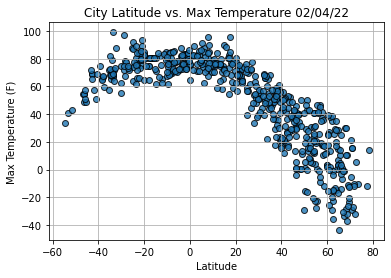

In [82]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

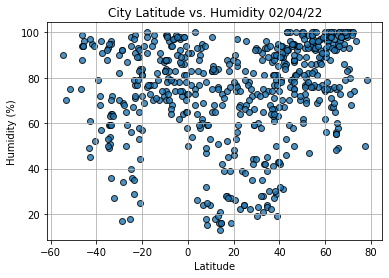

In [83]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

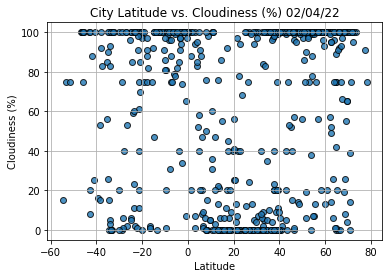

In [84]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

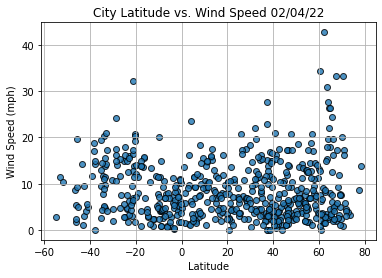

In [85]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()